# Data Simulation

参考论文：https://iopscience.iop.org/article/10.1088/1681-7575/aad146

### 1. 生成相位数据，依据公式（7）

#### 1.1 生成2个相互独立的维纳过程

In [ ]:
import os
import random
import numpy as np

seed = int(os.environ['seed'])
random.seed(seed)
np.random.seed(seed)
print("-------------------Seed = %s-------------------" % seed)

In [1]:
clock_size = 20  # i
T = 86400 * 30
t = np.arange(0,T)  # 0,1,2,3...100
x_0 = 0
y_0 = 10 ** (-14)
mu_1 = 8.8 * 10 ** (-14)
mu_2 = 5.6 * 10 ** (-18)
d_i = 0

Refer to: https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html <br>
$X(0) = X_0, X(t + dt) = X(t) + N(0, (delta)^2 dt; t, t+dt)$
where $N(a, b; t_1, t_2)$ is a normally distributed random variable with mean a and variance b. The parameters $t_1$ and $t_2$ make explicit the statistical independence of N on different time intervals; that is, if $[t_1, t_2)$ and $[t_3, t_4)$ are disjoint intervals, then $N(a, b; t_1, t_2)$ and $N(a, b; t_3, t_4)$ are independent.

In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

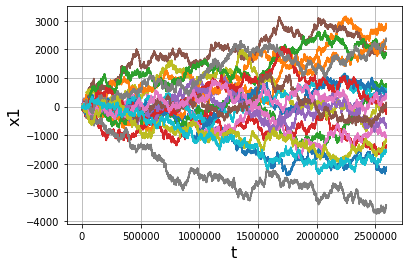

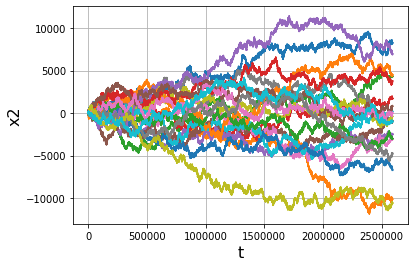

In [3]:
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta1 = 1
delta2 = 3
# Number of steps.
N = T
# Time step size
dt = T/N
# Number of realizations to generate.
m = clock_size
# Create an empty array to store the realizations.
x1 = np.empty((m,N+1))
x2 = np.empty((m,N+1))
# Initial values of x, x0
x1[:, 0] = 0
x2[:, 0] = 0

brownian(x1[:,0], N, dt, delta1, out=x1[:,1:])
brownian(x2[:,0], N, dt, delta2, out=x2[:,1:])

t_all = np.linspace(0.0, N*dt, N+1)
'''
for k in range(m):
    plot(t_all, x1[k])
xlabel('t', fontsize=16)
ylabel('x1', fontsize=16)
grid(True)
show()

for k in range(m):
    plot(t_all, x2[k])
xlabel('t', fontsize=16)
ylabel('x2', fontsize=16)
grid(True)
show()
'''

#### 1.2 计算x(t)

$ x{_i}(t)=x{_i}(0) + y{_i}(0) * t + 0.5 * d{_i} * t^{2} + \mu_i^{1} * W_i^{1}(t) + \mu_i^{2} * \sum_{s=0}^{t}W_i^{2}(s) $

$ i = 1,2,3..., x_{i}(0) = 0, y_{i}(0) = 1 * 10^{-14}, μ_i^1 = 8.8 * 10^{-14}, μ_i^2 = 5.6 * 10^{-18}, d_i = 0$

In [4]:
w1 = x1[:,:-1]
w2_square_sum = x2[:,:-1]

In [5]:
for i in range(N-1):
    w2_square_sum[:,i+1] += w2_square_sum[:,i]

In [6]:
# print(w2_square_sum)

[[ 0.00000000e+00 -2.26273262e-01  7.59963352e+00 ...  1.33300318e+10
   1.33300401e+10  1.33300483e+10]
 [ 0.00000000e+00 -4.02470451e+00 -1.01810332e+01 ... -9.52512257e+09
  -9.52513271e+09 -9.52514285e+09]
 [ 0.00000000e+00  1.26897443e+00 -1.74398982e+00 ...  8.94564822e+08
   8.94569153e+08  8.94573487e+08]
 ...
 [ 0.00000000e+00  6.24840403e+00  1.06587059e+01 ... -1.88155221e+09
  -1.88155693e+09 -1.88156164e+09]
 [ 0.00000000e+00 -6.18107811e-01  1.21093420e+00 ... -1.85266124e+10
  -1.85266229e+10 -1.85266335e+10]
 [ 0.00000000e+00 -2.31864870e+00  6.12548725e-01 ...  2.38372855e+09
   2.38372759e+09  2.38372663e+09]]


In [7]:
# print(w1)

[[ 0.00000000e+00  5.40103788e-01 -1.06583276e+00 ... -2.12337123e+03
  -2.12405497e+03 -2.12566934e+03]
 [ 0.00000000e+00  2.22203537e-01  1.28289817e-01 ...  2.85934883e+03
   2.85838534e+03  2.86029972e+03]
 [ 0.00000000e+00  8.21266061e-01 -4.22225324e-01 ...  7.64141696e+02
   7.64031780e+02  7.63701345e+02]
 ...
 [ 0.00000000e+00  1.01419791e-01  1.31341620e+00 ...  2.34774919e+03
   2.34818607e+03  2.34652408e+03]
 [ 0.00000000e+00  4.16705537e-01 -6.42054992e-02 ... -1.21368102e+03
  -1.21459708e+03 -1.21464974e+03]
 [ 0.00000000e+00  3.47181906e-01  3.60309592e-01 ... -1.56782719e+03
  -1.56708903e+03 -1.56834863e+03]]


In [8]:
x_t = x_0 + y_0 * t + 0.5 * d_i * t ** 2 + mu_1 * w1 + mu_2 * w2_square_sum

In [9]:
# print(x_t.shape)
# print(x_t[0][0:100])

(20, 2592000)
[ 0.00000000e+00  5.75278662e-14 -7.37507247e-14  2.34902962e-14
  2.93196126e-14  1.47740443e-13  1.67973767e-13  1.87493833e-13
  2.19314613e-13  1.79471058e-13  3.09927591e-13  5.35030011e-13
  5.16832112e-13  6.11535206e-13  6.01509965e-13  6.03983951e-13
  7.21735686e-13  6.44935716e-13  5.77359225e-13  4.91071591e-13
  5.52510126e-13  6.07052738e-13  7.81551259e-13  8.66323151e-13
  9.12563339e-13  8.94107480e-13  9.41815829e-13  9.89754726e-13
  1.07956562e-12  1.01249064e-12  1.00187003e-12  9.78829469e-13
  8.57966566e-13  8.41627063e-13  7.85541472e-13  8.11407561e-13
  8.80271630e-13  8.91063157e-13  9.32257675e-13  9.12667377e-13
  8.81529700e-13  8.93833440e-13  8.33987170e-13  8.48874795e-13
  9.09758288e-13  1.01450261e-12  1.01478634e-12  9.36215630e-13
  9.85893018e-13  1.04466589e-12  9.64646885e-13  1.06934873e-12
  8.79383610e-13  7.60510707e-13  6.97205374e-13  7.17145674e-13
  6.98925533e-13  7.04493518e-13  6.62114623e-13  7.42927390e-13
  9.4293963

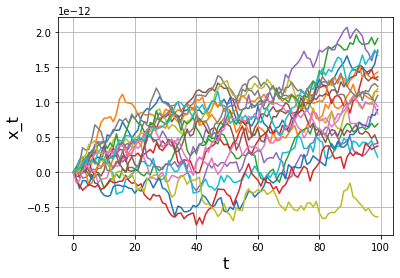

In [10]:
for k in range(x_t.shape[0]):
    plot(t[0:100], x_t[k][0:100])
xlabel('t', fontsize=16)
ylabel('x_t', fontsize=16)
grid(True)
show()

### 2. 由相位数据，生成频率数据，依据公式（8）

#### 2.1 初始化环境灵敏系数，依据 table 1

In [11]:
tau = 1

SST = -5 * 10 ** (-15)  # Static temperature
SDT = -1 * 10 ** (-14)  # Dynamic temperature
SM = 8 * 10 ** (-16)    # Magnetic field
SH = 2 * 10 ** (-16)    # Relative humidity

#### 2.2 初始化温度、湿度和磁场变化的数据分布 

In a typical temperature-controlled room, the peak-to-peak values of temperature, the rate of temperature change, the magnetic field and the relative humidity fluctuations are approximately 1 °C, 0.05 °C s−1, 0.12 μT and 3.5%, respectively, which leads to a maximum H-maser frequency change at the magnitude of 10^−15

$ T(t) = 0.5 * sin(\frac{\pi x}{20}) $

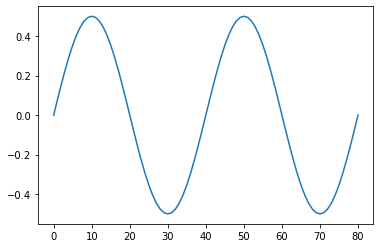

In [12]:
import math

delta_T = np.sin(np.arange(T) * math.pi / 20) * 0.5
delta_M = 0.12
delta_H = 0.035

# plot(delta_T[0:81])

#### 2.3 生成频率数据

$ Y{_i}(t) = \frac{x{_i}(t + \tau) - x{_i}(t)}{\tau} + S_{ST} * [T_i(t) - T_i(0)] + S_{DT} * \frac{dT_i(t)}{dt} + S_M * [M_i(t) - M_i(0)] + S_H * [H_i(t) - H_i(0)] $

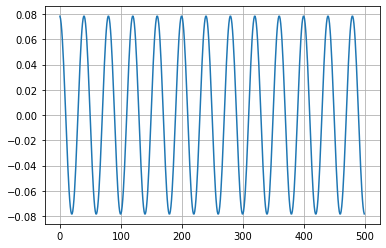

In [14]:
dx = np.diff(x_t)
dT = np.diff(delta_T)
'''
plot(t[0:500], dT[0:500])
grid(True)
show()
'''
Y_t = dx + SST * delta_T[:-1] + SDT * dT + SM * delta_M + SH * delta_H

#### 2.4 保存模拟数据

In [17]:
cov0_csv = "./data/seed" + str(seed) + "-0-cov.csv"
cov20_csv = "./data/seed" + str(seed) + "-20-cov.csv"

np.savetxt(cov0_csv, dx, delimiter=",")
np.savetxt(cov20_csv, Y_t, delimiter=",")

print("Simulated Data saved as '%s' and '%s'" % (cov0_csv, cov20_csv))

Simulated Data saved as '0-cov.csv' and '20-cov.csv'
